## Prueba de ciencia de datos

## Nicolás Echeverri Rojas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', None)

import seaborn as sns
plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")

C:\Users\nicolas\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicolas\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\nicolas\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
np.version.version

'1.19.5'

## 1. Carga de datos

In [3]:
df = pd.read_csv('datalake/dataset.csv')

## Visualización preliminar

In [4]:
df.head()

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration
0,SHP263573,2019-03-14 11:57:42,Rotterdam,Kuala Lumpur,NL,MY,93.8600,665.0,0.9,Ocean,Neele-Vat Logistics,29.34514
1,SHP90587,2019-06-13 09:32:47,Rotterdam,Kuala Lumpur,NL,MY,87.2343,180.0,0.9,Ocean,Neele-Vat Logistics,18.33877
2,SHP607571,2019-03-07 11:39:49,Rotterdam,Kuala Lumpur,NL,MY,92.4500,97.0,0.9,Ocean,Neele-Vat Logistics,9.22095
3,SHP291606,2020-02-05 23:00:32,Rotterdam,Kuala Lumpur,NL,MY,92.9000,1000.0,0.9,Ocean,Neele-Vat Logistics,13.94815
4,SHP774605,2020-01-04 17:02:40,Rotterdam,Kuala Lumpur,NL,MY,91.9500,1406.0,0.9,Ocean,Neele-Vat Logistics,11.46296


## Estructura, tipo y tamaño de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shp_code        5114 non-null   object 
 1   departure       5114 non-null   object 
 2   city_from       5114 non-null   object 
 3   city_to         5114 non-null   object 
 4   country_from    5114 non-null   object 
 5   country_to      5114 non-null   object 
 6   cost_per_kg     5114 non-null   float64
 7   gross_weight    5114 non-null   float64
 8   carrier_charge  5114 non-null   float64
 9   mode            5114 non-null   object 
 10  carrier         5114 non-null   object 
 11  duration        5114 non-null   float64
dtypes: float64(4), object(8)
memory usage: 479.6+ KB


In [6]:
print('Cantidad de filas y columnas:', df.shape)

Cantidad de filas y columnas: (5114, 12)


Primeramente se observa que las columnas poseen valores de formato acordes a su naturaleza intrínseca, la única columna a la que se le debe de realizar casting es a la columna "departure" 

Se observa que no se presentan datos nulos en ninguna columna

Según la información suministrada, la explicación de las columnas es:

- 'shp_code' -> Unique shipment identifier
- 'departure' -> Exact departure date of shipment
- 'city_from' -> Departure city
- 'city_to' -> Arrival city
- 'country_from' -> Departure country
- 'country_to' -> Arrival country
- 'cost_per_kg' -> Shipping cost per kilogram
- 'gross_weight' -> Gross weight in kilograms
- 'carrier_charge' -> Carrier rate factor
- 'mode' -> Transport mode
- 'carrier' -> Transportation company
- 'duration' -> Shipping time in days

(Se observa que está errada la explicación de 'country_to' puesto que esta debe de ser 'Arrival country')

# 2.1

## a) Cálculo de la fecha exacta en la que llega los encargos

Cambiando el tipo a datetime para poder realizar operaciones con fechas

In [7]:
df['departure']=pd.to_datetime(df['departure'], format="%Y-%m-%d %H:%M:%S")  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   shp_code        5114 non-null   object        
 1   departure       5114 non-null   datetime64[ns]
 2   city_from       5114 non-null   object        
 3   city_to         5114 non-null   object        
 4   country_from    5114 non-null   object        
 5   country_to      5114 non-null   object        
 6   cost_per_kg     5114 non-null   float64       
 7   gross_weight    5114 non-null   float64       
 8   carrier_charge  5114 non-null   float64       
 9   mode            5114 non-null   object        
 10  carrier         5114 non-null   object        
 11  duration        5114 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 479.6+ KB


Usando la columna 'duration' para sumar este tiempo al tiempo de salida pero primeramente se observa que no posea algún tipo de datos aparentemente anómalo

In [9]:
df['duration'].describe()

count    5114.000000
mean       12.641822
std        10.273164
min         5.000000
25%         5.199910
50%         5.405150
75%        19.644270
max        57.249650
Name: duration, dtype: float64

A primera visto los datos parecen ser correctos

In [10]:
df.head(1)

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration
0,SHP263573,2019-03-14 11:57:42,Rotterdam,Kuala Lumpur,NL,MY,93.86,665.0,0.9,Ocean,Neele-Vat Logistics,29.34514


In [11]:
df['arrival']=df['departure']+pd.to_timedelta(df['duration'],unit='D' )
df.head()

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration,arrival
0,SHP263573,2019-03-14 11:57:42,Rotterdam,Kuala Lumpur,NL,MY,93.8600,665.0,0.9,Ocean,Neele-Vat Logistics,29.34514,2019-04-12 20:14:42.096
1,SHP90587,2019-06-13 09:32:47,Rotterdam,Kuala Lumpur,NL,MY,87.2343,180.0,0.9,Ocean,Neele-Vat Logistics,18.33877,2019-07-01 17:40:36.728
2,SHP607571,2019-03-07 11:39:49,Rotterdam,Kuala Lumpur,NL,MY,92.4500,97.0,0.9,Ocean,Neele-Vat Logistics,9.22095,2019-03-16 16:57:59.080
3,SHP291606,2020-02-05 23:00:32,Rotterdam,Kuala Lumpur,NL,MY,92.9000,1000.0,0.9,Ocean,Neele-Vat Logistics,13.94815,2020-02-19 21:45:52.160
4,SHP774605,2020-01-04 17:02:40,Rotterdam,Kuala Lumpur,NL,MY,91.9500,1406.0,0.9,Ocean,Neele-Vat Logistics,11.46296,2020-01-16 04:09:19.744


## b) Cómputo del precio del cliente

Para esto se hace uso de las columnas:

- 'cost_per_kg' -> Costo del envío por kilogramo

- 'gross_weight' -> Peso bruto en kilogramos

- 'carrier_charge' -> Factor de tarifa del operador

Analizando que no hayan valores anormales

In [12]:
df[['cost_per_kg','gross_weight','carrier_charge' ]].describe()

,cost_per_kg,gross_weight,carrier_charge
count,5114.000000,5114.000000,5114.000000
mean,91.200923,954.074099,0.871732
std,5.154340,1266.102859,0.127972
min,82.885600,5.000000,0.562500
25%,87.750000,225.000000,0.750000
50%,90.750000,505.000000,0.900000
75%,92.837500,1100.000000,0.900000
max,115.620000,10000.000000,1.125000


Según los estadísticos mostrados, no hay valores anormales en estas columnas

In [13]:
df['carrier_charge'].unique()

array([0.9   , 1.05  , 0.75  , 0.5625, 1.125 ])

In [14]:
df['customer_price']=df['cost_per_kg']*df['gross_weight']*df['carrier_charge']

In [15]:
df.head()

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration,arrival,customer_price
0,SHP263573,2019-03-14 11:57:42,Rotterdam,Kuala Lumpur,NL,MY,93.8600,665.0,0.9,Ocean,Neele-Vat Logistics,29.34514,2019-04-12 20:14:42.096,56175.2100
1,SHP90587,2019-06-13 09:32:47,Rotterdam,Kuala Lumpur,NL,MY,87.2343,180.0,0.9,Ocean,Neele-Vat Logistics,18.33877,2019-07-01 17:40:36.728,14131.9566
2,SHP607571,2019-03-07 11:39:49,Rotterdam,Kuala Lumpur,NL,MY,92.4500,97.0,0.9,Ocean,Neele-Vat Logistics,9.22095,2019-03-16 16:57:59.080,8070.8850
3,SHP291606,2020-02-05 23:00:32,Rotterdam,Kuala Lumpur,NL,MY,92.9000,1000.0,0.9,Ocean,Neele-Vat Logistics,13.94815,2020-02-19 21:45:52.160,83610.0000
4,SHP774605,2020-01-04 17:02:40,Rotterdam,Kuala Lumpur,NL,MY,91.9500,1406.0,0.9,Ocean,Neele-Vat Logistics,11.46296,2020-01-16 04:09:19.744,116353.5300


## 2.2 Analizando la compañia  NTG Air & Ocean. Nordic Transport Group (“NTG”)

Analizando caules compañias están en el dataset de tal manera de conocer si se ha escrito de forma diferente en alguna parte el nombre de la compañia a analizar

In [16]:
df['carrier'].unique()

array(['Neele-Vat Logistics', 'Van den Bosch Transporten',
       'NTG Air & Ocean'], dtype=object)

Se observa que se ha escrito correctamente el nombre de 'NTG Air & Ocean' puesto que no existen nombres parecidos a este en la lista de los valores únicos

In [17]:
dfNTG=df[df['carrier']=='NTG Air & Ocean']

In [18]:
dfNTG.head(2) 

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration,arrival,customer_price
6,SHP381583,2019-05-18 17:20:39,Rotterdam,Kuala Lumpur,NL,MY,89.91,115.0,0.75,Air,NTG Air & Ocean,5.21829,2019-05-23 22:34:59.256,7754.7375
9,SHP284606,2020-02-05 14:49:51,Rotterdam,Kuala Lumpur,NL,MY,93.15,105.0,0.75,Air,NTG Air & Ocean,5.27546,2020-02-10 21:26:30.744,7335.5625


Discriminando los datos a los cargamentes que llegan sólo a Malasia

In [19]:
dfNTG['city_to'].unique()

array(['Kuala Lumpur'], dtype=object)

Kuala Lumpur es la capital de Malasia, de tal manera que ya se posee los datos segregados correctamente

## a) 

In [20]:
def plot_statistics(df, column):
    
    colors=['red','yellow','green','purple','orange','blue']
    describeSerie=df[column].describe()
    i=0
    for name in describeSerie.index:
    
        if name=='count' or name=='std':
            continue
                
        plt.axvline(describeSerie[name],label=name, color=colors[i] )
        i=i+1
        
    plt.legend()    
    sns.distplot(df[column],color='red')
    
    print(describeSerie)

count    1656.000000
mean       90.299647
std         2.973050
min        83.006376
25%        87.750000
50%        90.745000
75%        92.740000
max        96.550000
Name: cost_per_kg, dtype: float64


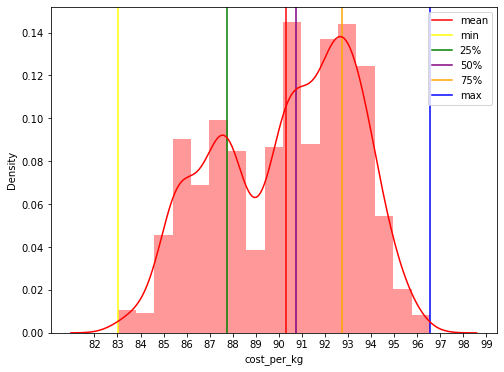

In [21]:
plot_statistics(dfNTG,'cost_per_kg')
plt.xticks(np.arange(82,100,1) )
plt.show()
plt.close()

Se observa en la gráfica de costos por kilogramo:

- Posee una distribución bimodal con picos que se encuentran alrededor de los percentiles 25 y 75, es decir, alrededor de 87 modena/kg y 92.44 modena/kg, sin embargo el pico más prominente se encuentra alrededor de 92 moneda/kg, de tal manera que valores cercanos a 92 moneda/kg son los precios más frecuencias a la hora de calcular el costo del envio.


- el valor mínimo de costo es 83 moneda/kg y el valor máximo es 96 moneda/kg


- Leve asimetría negativa puesto que la posición de la media es menor a la de la mediana lo que indica las tarifas se inclinan a valores más costosos

count    1656.000000
mean      587.984438
std       513.659203
min         5.000000
25%       198.500000
50%       400.000000
75%      1000.000000
max      2283.000000
Name: gross_weight, dtype: float64


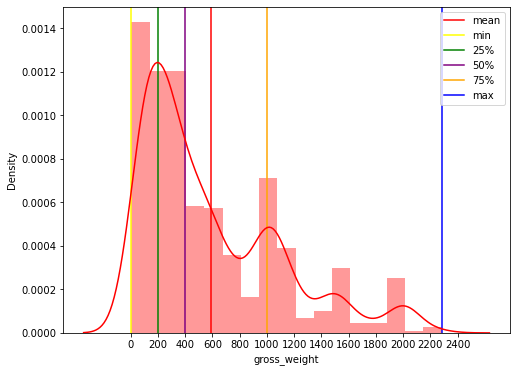

In [22]:
plot_statistics(dfNTG, 'gross_weight')
plt.xticks(np.arange(0,2600,200) )
plt.show()
plt.close()

Se observa que la distribución de probabilidad de peso bruto:

- la mayor masa de probabilidad se encuentra en el intervalo [5,198] kg, de tal manera que es más probable que se se realice un cargamente liviano


- Posee asimetría positiva lo que indica que la mayoría de los aviones de carga llevan consigo cargamento liviano puesto que el 50% los aviones llevan consigo cargamento menor a 400 kg


- Posee una desviación estandar comparable a la media de los datos, lo que indica que los datos están ampliamente distribuidos en el intervalo de [5,2283] kg


- Se extiende hasta valores mínimos de 5 kg hasta 2283 kg

count    1656.000000
mean        5.212321
std         0.124272
min         5.000000
25%         5.103240
50%         5.213945
75%         5.320518
max         5.423610
Name: duration, dtype: float64


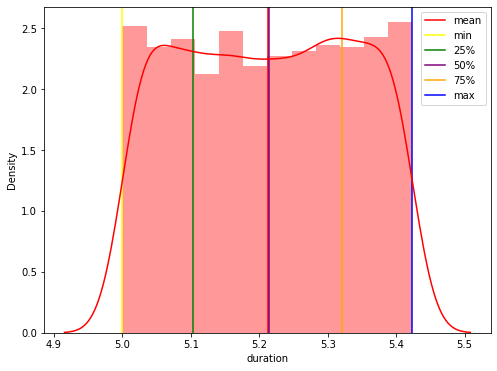

In [23]:
plot_statistics(dfNTG,'duration')
plt.show()
plt.close()

La gráfica de distribución de probabilidad de la duración del viajes:

- es bastante uniforme, lo que indica que existe aproximadamente igual cantidad viajes sin importar la duración de este sin embargo, se nota un leve aumento tanto alrededor de 5 días como de 5.4 días, de tal que estos datos sugieren que levemente es más probable que se los viajes ya sean cortos (5 días) o  largos (5.4 días) 


- es poco asimétrica puesto que su media y mediana coinciden  en 5.21 días, lo que indica que los viajes de acuerdo a duración están aproximadamente igual distribuidos


- el viaje con mayor duración es de 5.42 días y el de menor duración de 5 días

## b)

In [24]:
dfNTG.head()

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration,arrival,customer_price
6,SHP381583,2019-05-18 17:20:39,Rotterdam,Kuala Lumpur,NL,MY,89.91,115.0,0.75,Air,NTG Air & Ocean,5.21829,2019-05-23 22:34:59.256,7754.7375
9,SHP284606,2020-02-05 14:49:51,Rotterdam,Kuala Lumpur,NL,MY,93.15,105.0,0.75,Air,NTG Air & Ocean,5.27546,2020-02-10 21:26:30.744,7335.5625
12,SHP146604,2019-10-21 16:37:57,Rotterdam,Kuala Lumpur,NL,MY,89.81,2008.0,0.75,Air,NTG Air & Ocean,5.05509,2019-10-26 17:57:16.776,135253.8600
16,SHP451606,2020-02-20 10:28:26,Rotterdam,Kuala Lumpur,NL,MY,91.98,500.0,0.75,Air,NTG Air & Ocean,5.02801,2020-02-25 11:08:46.064,34492.5000
20,SHP577605,2019-12-26 13:03:40,Rotterdam,Kuala Lumpur,NL,MY,94.97,220.0,0.75,Air,NTG Air & Ocean,5.21840,2019-12-31 18:18:09.760,15670.0500


In [25]:
dfNTG['monthDeparture']=dfNTG['departure'].dt.month
dfNTG['dayDeparture']=dfNTG['departure'].dt.day

dfNTG['monthArrival']=dfNTG['arrival'].dt.month
dfNTG['dayArrival']=dfNTG['arrival'].dt.day

In [26]:
dfNTG.head()

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration,arrival,customer_price,monthDeparture,dayDeparture,monthArrival,dayArrival
6,SHP381583,2019-05-18 17:20:39,Rotterdam,Kuala Lumpur,NL,MY,89.91,115.0,0.75,Air,NTG Air & Ocean,5.21829,2019-05-23 22:34:59.256,7754.7375,5,18,5,23
9,SHP284606,2020-02-05 14:49:51,Rotterdam,Kuala Lumpur,NL,MY,93.15,105.0,0.75,Air,NTG Air & Ocean,5.27546,2020-02-10 21:26:30.744,7335.5625,2,5,2,10
12,SHP146604,2019-10-21 16:37:57,Rotterdam,Kuala Lumpur,NL,MY,89.81,2008.0,0.75,Air,NTG Air & Ocean,5.05509,2019-10-26 17:57:16.776,135253.8600,10,21,10,26
16,SHP451606,2020-02-20 10:28:26,Rotterdam,Kuala Lumpur,NL,MY,91.98,500.0,0.75,Air,NTG Air & Ocean,5.02801,2020-02-25 11:08:46.064,34492.5000,2,20,2,25
20,SHP577605,2019-12-26 13:03:40,Rotterdam,Kuala Lumpur,NL,MY,94.97,220.0,0.75,Air,NTG Air & Ocean,5.21840,2019-12-31 18:18:09.760,15670.0500,12,26,12,31


In [27]:
dfDailyDeparture=dfNTG.groupby('dayDeparture').mean()
dfMonthDeparture=dfNTG.groupby('monthDeparture').mean()

dfDailyArrival=dfNTG.groupby('dayArrival').mean()
dfMonthArrival=dfNTG.groupby('monthArrival').mean()

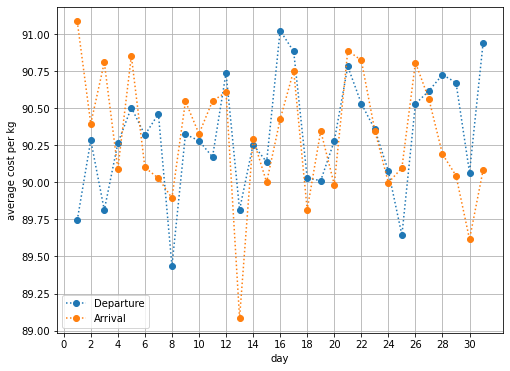

In [28]:
plt.plot(dfDailyDeparture['cost_per_kg'], "o:",label="Departure")
plt.plot(dfDailyArrival['cost_per_kg'], "o:", label="Arrival")
plt.xlabel("day")
plt.ylabel("average cost per kg")
plt.xticks(np.arange(0,31,2) )
plt.legend()
plt.grid()

Se observa un comportamiento el en promedio de precios por día muy oscilatorio, sin embargo se puede obtener información validosa de este:

- El día donde es más costoso el envio por kg es el 16 con un valor de 91 moneda/kg, esto podría deberse a que los días 15 y 16 las personas tienden a comprar más artículos debido al pago de su salario, de tal manera que al aumentar el número de envios, el precio incrementa


- El dia 8 y 25 son los días donde el precio promedio por kg es menor, lo cual indica que este es el mejor día para realizar un envío para la compañía


- Se observa una cierta periodicidad, pues los días 3,8,13,19,25,30 son días donde se presenta un mínimo local. Si se fija en esta secuencia, estos se dan en espacios consecuntivos de 5 o 6 días


- Los picos de costo en deliver como en arrival se dan simultáneamente excepto en los días desde 1 al 4

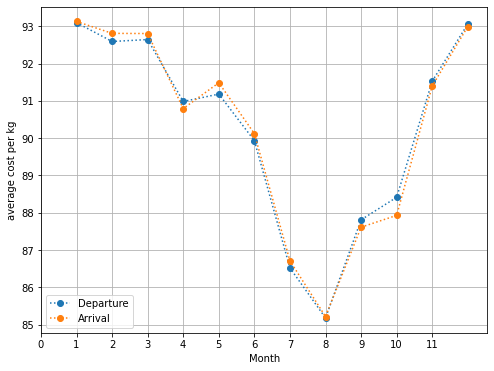

In [29]:
plt.plot(dfMonthDeparture['cost_per_kg'], "o:", label="Departure")
plt.plot(dfMonthArrival['cost_per_kg'], "o:",label="Arrival")
plt.xlabel("Month")
plt.ylabel("average cost per kg")
plt.xticks(np.arange(0,12,1) )
plt.legend()
plt.grid()

Se observa que los precios más elevados son los meses enero y diciembre, esto tiene sentido puesto que es temporada donde el comercio posee una gran alza, luego de enero empieza a caer casi linealmente hasta alcanzar su valor mínimo de 85 moneda/kg en el mes 8 es decir, agosto, luego de esto empieza a incrementar de nuevo con una tendencia lineal.

El comportamiento tanto en el mes de salida como de llegada en comportaminiento son idénticos

## C)

In [30]:
dfNTG.set_index('departure', inplace=True)
dfNTGsept=dfNTG['2019-09':] #accediendo sólo de Septiembre en adelante
dfNTGsept.reset_index(inplace=True)

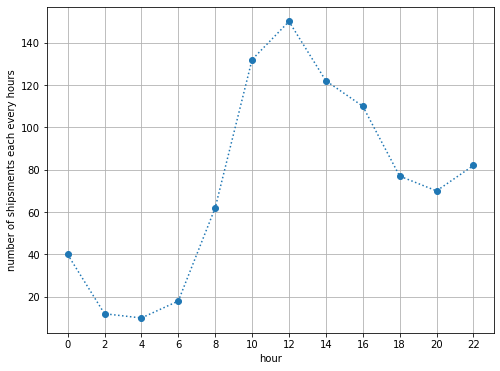

In [31]:
numberShips2Hours=(dfNTGsept.groupby( dfNTGsept['departure'].dt.floor('2h').dt.hour )
                   .size().reset_index(name='count')) #contando los elementos cada 2H
plt.plot(numberShips2Hours['departure'] , numberShips2Hours['count'],"o:")
plt.ylabel("number of shipsments each every hours")
plt.xlabel("hour")
plt.xticks(np.arange(0,24,2) )
plt.grid()

Se observa que desde las 4:00 el número de envios posee una tendencia cuadráctica, hasta alcanzar el máximo en alrededor de 150 envios entre las 12:00-13:59, luego de esto, la tendencia empieza a decrecer también cuadraticamente.

se puede concluir:
- La mayor cantidad de envios se da desde el medio día hasta aproxidamente las 6 de la tarde.


- No se tiende a realizar envios en la madruga (0:00-5:59) debido posiblemente a condiciones climáticas puesto que existe una caida pronunciada en número de envios al pasar de las 22-23:59 a las 0:00-1:59.

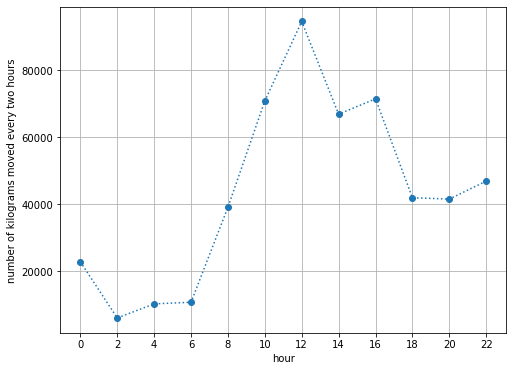

In [32]:
numberShips2HoursTotalWeight=(dfNTGsept.groupby( dfNTGsept['departure']
                                                .dt.floor('2h').dt.hour )['gross_weight']
                              .sum().reset_index(name='total weight'))

plt.plot(numberShips2HoursTotalWeight['departure'] , numberShips2HoursTotalWeight['total weight'],"o:")
plt.ylabel("number of kilograms moved every two hours")
plt.xlabel("hour")
plt.xticks(np.arange(0,24,2) )
plt.grid()

Se observa una tendencia muy similar a la gráfica anterior:

- La mayor cantidad de mas transportada se da entre las 12:00-13:59, esto está totalmente de acuerdo con que la mayor cantidad de viajes se da a esta hora.


- En la madruga (0:00-5:59) se transporta la menor cantidad de masa, lo que también está de acuerdo con que a estas horas es en donde se realiza en menos viajes.



## 2.3)  Modelo de serie de tiempo

### predicción del costo promedio por kg

Como se pide predecir el costo promedio el día siguiente, se realiza el gráfico de la serie de tiempo correspondiente

In [33]:
dfAvgPrice=(dfNTG.groupby( [ dfNTG.index.floor('1d') ] )['cost_per_kg']
           .mean()
           .rename_axis('date')
          . reset_index(name='AvgPrice') )

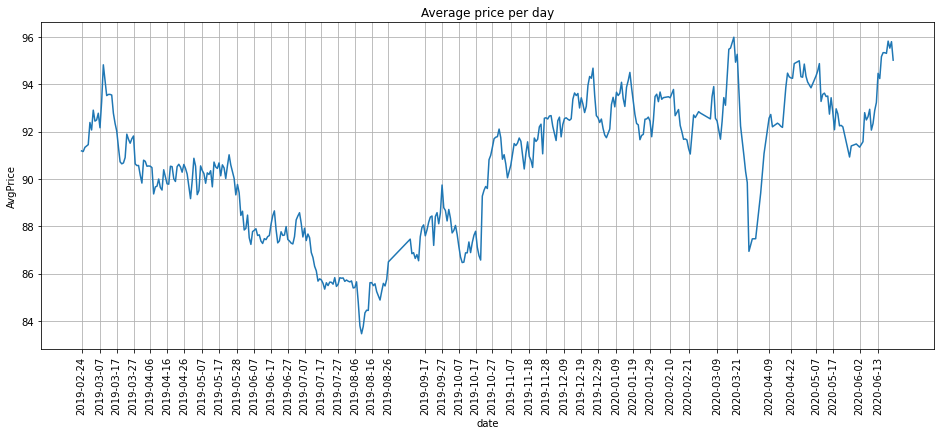

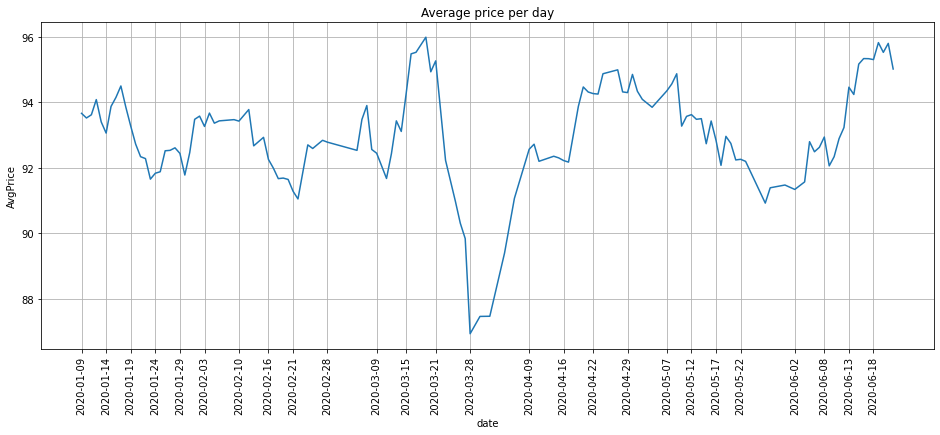

In [34]:
fig,ax=plt.subplots(figsize=(16,6))
plt.title("Average price per day")
sns.lineplot(data=dfAvgPrice, x='date', y='AvgPrice')
plt.grid()
plt.xticks( np.array(dfAvgPrice['date'])[::10] )
ax.tick_params(axis='x', rotation=90)


fig,ax=plt.subplots(figsize=(16,6))
plt.title("Average price per day")
sns.lineplot(data=dfAvgPrice.iloc[300:], x='date', y='AvgPrice')
plt.grid()
plt.xticks( np.array(dfAvgPrice['date'])[300::5] )
ax.tick_params(axis='x', rotation=90)

Se observa una tendencia lineal a la baja de precios promedio desde febrero el 24 de 2019 hasta el 7 de agosto de 2019, posteriormente la tendencia crece logaritmicamente, lo que indica que la tendencia se está estabilizando, sin embargo podemos observar que existe una caida abrupta alrededor del 28 de marzo de 2020

## Implementación de distintos algoritmos

### Nota: el algoritmo que mejor se desempeña para el problema es el 4. LSTM, se encuentra al final



## 1. Regresión multilineal

Se hace uso de la regresión multi-lineal con el objetivo de establecer un primer modelo, sencillo, computacionalmente poco costoso de tal manera de tener como referencia el desempeño de un modelo básico

In [35]:
dfAvgPrice.head(2)

,date,AvgPrice
0,2019-02-24,91.181667
1,2019-02-25,91.155000


In [36]:
n = len(dfAvgPrice)
dfAvgPrice['time index']=np.arange(0,n) #creando una variable 

In [37]:
dfAvgPrice['month_name']=dfAvgPrice['date'].dt.month_name()
dfAvgPrice['day']=dfAvgPrice['date'].dt.day
dfAvgPrice['day_name']=dfAvgPrice['date'].dt.day_name()

In [38]:
dfAvgPrice.head()

,date,AvgPrice,time index,month_name,day,day_name
0,2019-02-24,91.181667,0,February,24,Sunday
1,2019-02-25,91.155000,1,February,25,Monday
2,2019-02-26,91.330000,2,February,26,Tuesday
3,2019-02-28,91.446540,3,February,28,Thursday
4,2019-03-01,92.381705,4,March,1,Friday


Introduciendo variables que den cuenta de la variación estacional

In [39]:
dum=pd.get_dummies(dfAvgPrice['month_name'])
dfAvgPrice_dum=dfAvgPrice.copy()

dfAvgPrice_dum=pd.concat((dfAvgPrice_dum, dum), axis=1)

In [40]:
dum=pd.get_dummies(dfAvgPrice['day_name'])
dfAvgPrice_dum=pd.concat((dfAvgPrice_dum, dum), axis=1)

In [41]:
dfAvgPrice_dum.head(1)

,date,AvgPrice,time index,month_name,day,day_name,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2019-02-24,91.181667,0,February,24,Sunday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Se deben de dividir los datos en orden pues en las series de tiempo, a diferencia de otros modelos, es menester conservar el orden de las fechas para una correcta predicción

In [42]:
df_train = dfAvgPrice[0:int(n*0.8)]
df_test = dfAvgPrice[int(n*0.8):]

In [43]:
x_train=df_train.drop(labels=['month_name', 'AvgPrice','date','day_name'], axis=1)
x_test=df_test.drop(labels=['month_name', 'AvgPrice','date','day_name'], axis=1)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
x_train=StandardScaler().fit_transform( x_train.astype(float) )
x_test=StandardScaler().fit_transform( x_test.astype(float) )

In [46]:
y_train=df_train[['AvgPrice']]
y_test=df_test[['AvgPrice']]

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()
model.fit(x_train,y_train)

y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)

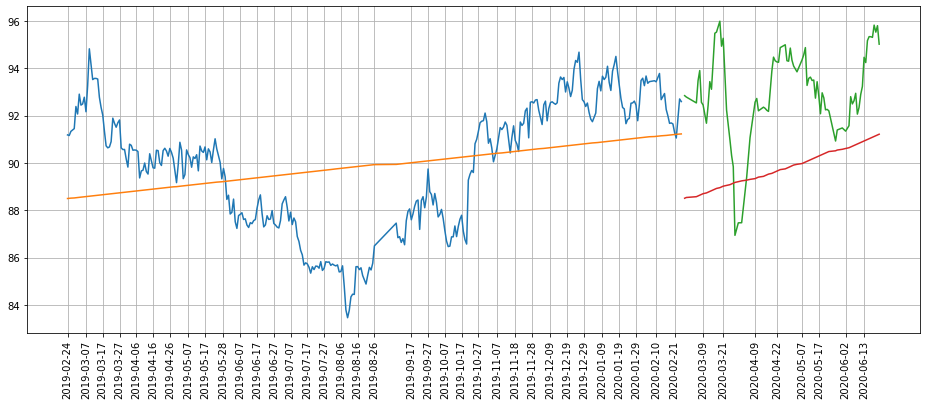

In [49]:
fig,ax=plt.subplots(figsize=(16,6))

plt.plot(df_train['date'], df_train['AvgPrice'])
plt.plot(df_train['date'], y_train_predict)

plt.plot(df_test['date'], df_test['AvgPrice'])
plt.plot(df_test['date'], y_test_predict)
plt.xticks( np.array(dfAvgPrice['date'])[::10] )
plt.grid()
plt.tick_params(axis='x', rotation=90)
plt.show()
plt.close()

In [50]:
model.score(x_test, y_test)

-3.2196352994779476

El modelo de regresión multilineal no se ajusta de buena manera a los datos puesto que el score es negativo, lo que significa underfitting, por tanto se prueba otros modelos.

Se podría mejorar este realizando PCA u otro algoritmo para seleccionar las características más significativas para alimentar al modelo

## 2. Random forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
forest = RandomForestRegressor(n_estimators=25, min_samples_leaf=25)
forest.fit(x_train,y_train)

y_train_predict=forest.predict(x_train)
y_test_predict=forest.predict(x_test)

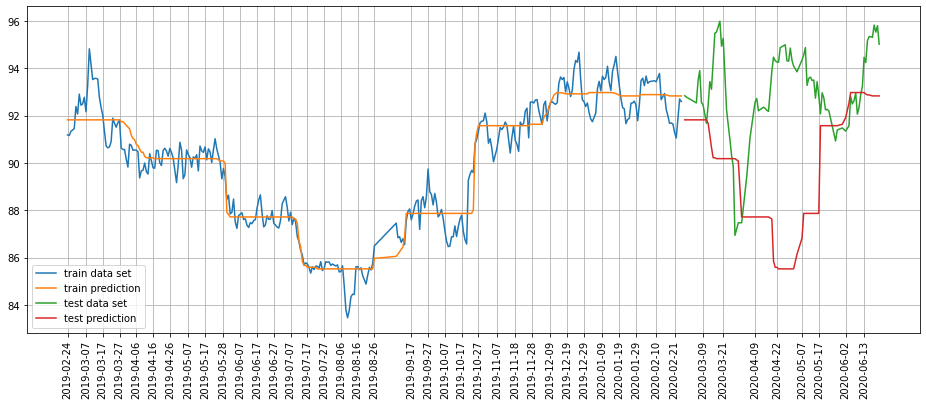

In [53]:
fig,ax=plt.subplots(figsize=(16,6))

plt.plot(df_train['date'], df_train['AvgPrice'], label="train data set")
plt.plot(df_train['date'], y_train_predict, label="train prediction")

plt.plot(df_test['date'], df_test['AvgPrice'], label="test data set")
plt.plot(df_test['date'], y_test_predict, label="test prediction")
plt.xticks( np.array(dfAvgPrice['date'])[::10] )
plt.grid()
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.show()
plt.close()

Se observa que hasta ahora, visualemnte, es el mejor modelo, sin embargo se observa que posee overfitting puesto que el desempeño en los datos de test no es bueno

## 3. ARIMA model

Se escoge esta aproxamación al problema pues se puede ver a simple vista que la serie de tiempo de precio promedio no es estacionaria y su comportamiento no es simple y como ARIMA posee gran desempeño en este tipo de comportamientos, se usa este

In [54]:
df_train = dfAvgPrice[0:int(n*0.8)]
df_test = dfAvgPrice[int(n*0.8):]

#### Testeando estacionalidad

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
adfuller(df_train['AvgPrice'])

(-1.5505013976649094,
 0.5083977318315774,
 4,
 339,
 {'1%': -3.4497880749874628,
  '5%': -2.870103829170425,
  '10%': -2.571332495975496},
 480.3599862574682)

Se conclye entonces que como el valor p dado: 0.508 es mayor que 0.025 para un nivel de significancia de 5% los datos no son estacionarios y se debe de realizar una conversión mediante diferenciación

#### convirtiendo los datos a estacionarios

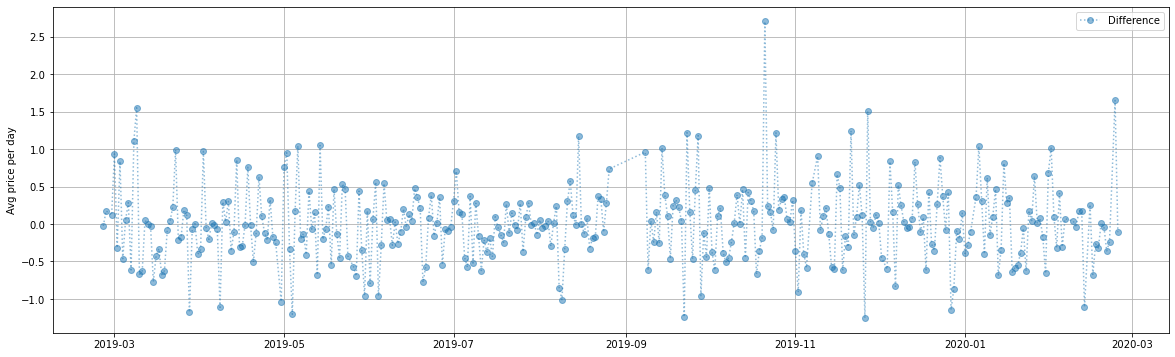

In [57]:
difference = df_train['AvgPrice'].diff()

plt.figure(figsize=(20,6))
plt.plot(df_train['date'],difference,'o:',alpha=0.5)
plt.legend(['Difference'])
plt.ylabel('Avg price per day')
plt.grid()
plt.show()

In [58]:
difference.dropna(inplace=True)

In [59]:
adfuller(difference)

(-15.66179455478877,
 1.550726657890965e-28,
 1,
 341,
 {'1%': -3.449673193310592,
  '5%': -2.8700533746644323,
  '10%': -2.5713055939491403},
 478.1944069755305)

De tal manera que ahora se tiene datos estacionarios puesto que p-value=1e-28 <0.025. Así, al valor d de ARIMA se le asigna 0 puesto que se pudo hacer estacionaria con un solo paso

####   PACF-> encontrar p: lag, ACF->encontrar q: magnitud de la ventana de media móvil 

In [60]:
df_train.tail(1)

,date,AvgPrice,time index,month_name,day,day_name
343,2020-02-25,92.59,343,February,25,Tuesday


In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Convirtiendo los datos a estacionarios

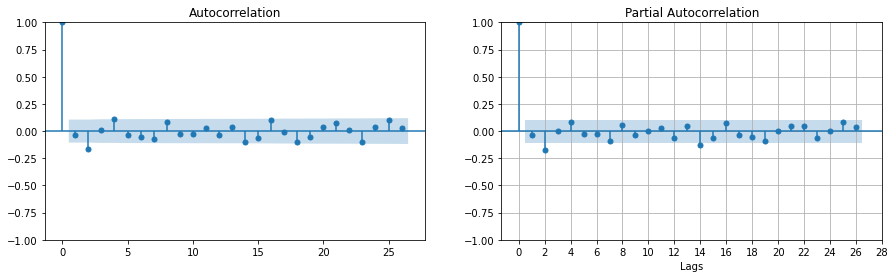

In [62]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
res1 = plot_acf(difference,ax=ax[0])
plt.xlabel('Lags')
plt.xticks(np.arange(0,30,2))
plt.grid()

res2 = plot_pacf(difference,ax=ax[1])
plt.xlabel('Lags')
plt.xticks(np.arange(0,30,2))
plt.show()
plt.close()

Se observa de acuerdo a las gráficas de PACF Y ACF los valores más óptimospara p y q es 2 

#### Entrenando el modelo

In [63]:
from statsmodels.tsa.arima.model import ARIMA

In [64]:
model_arima = ARIMA(difference,order=(2,0,2)).fit()

C:\Users\nicolas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nicolas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nicolas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [65]:
model_arima.aic

516.8775925882728

mean square error = 0.255132920483886


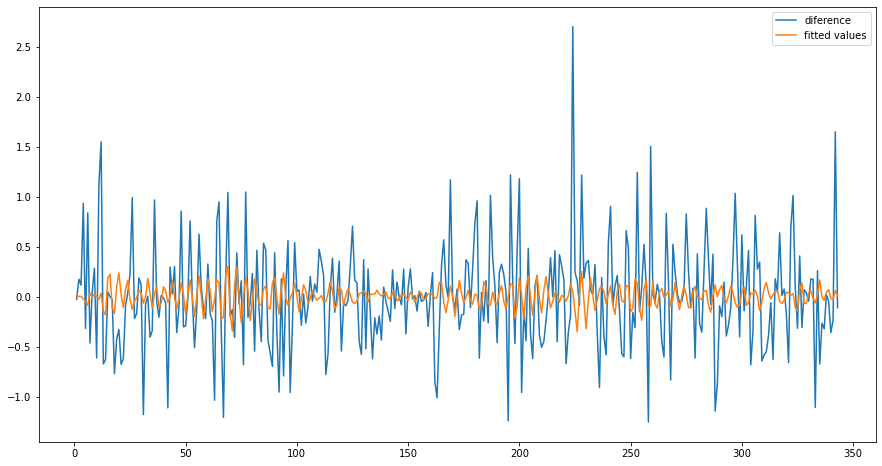

In [66]:
from sklearn.metrics import mean_squared_error
fitted_values = model_arima.fittedvalues

mse = mean_squared_error(difference,fitted_values)
print('mean square error =',mse)


fig,ax = plt.subplots(figsize=(15,8))
difference.plot(kind='line',ax=ax, label="diference")
fitted_values.plot(kind='line',ax=ax, label="fitted values")
plt.legend()

El MSE no es muy grande lo que a priori signifca que se está realizando una buena predicción, sin embargo, al ver la gráfica se observa que se está subestimando en gran medida las diferencia en el modelo establecido

#### Predicción

In [67]:
predictions = model_arima.predict(start=df_train.shape[0],end=(df_train.shape[0]+df_test.shape[0]-1))

C:\Users\nicolas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [68]:
intial_value=(df_train.iloc[-1])['AvgPrice']

In [69]:
forecasted_values = intial_value + predictions.cumsum()

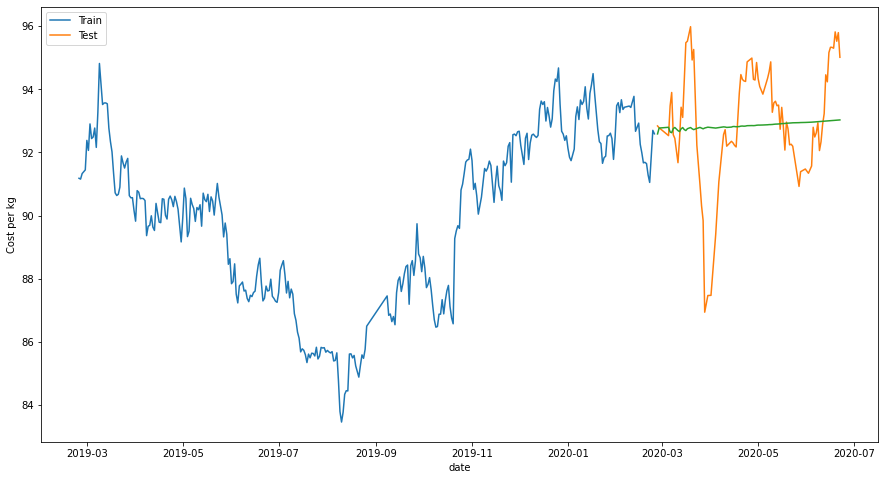

In [70]:
fig,ax = plt.subplots(figsize=(15,8))

plt.plot(df_train['date'],df_train['AvgPrice'], label='Train')
plt.plot(df_test['date'],df_test['AvgPrice'], label='Test')
plt.plot( df_test['date'],forecasted_values)
plt.xlabel('date')
plt.ylabel('Cost per kg')
plt.legend()
plt.show()

No se observa una buena predicción de los valores puesto que se subestimar en gran medida los valores del conjunto de test

### d)

Los modelos planteanos no arrojaron resultados satisfactorios a la hora de realizar predicciones de los datos del promedio de costo por kg, para mejorar estos se propone hacer uso de las redes neuronales recurrentes o RNN puesto que debido a su arquitectura poseen "memoria" de los datos con los cuales se alimenta. un ejemplo de ello es la predicción planetada en el libro Deep learning-Francois Collet y usar los diferentes mecanimos que se presentan como dropout regularization para evitar overfitting junto con Callbacks para encontrar la época en donde se encuentren las mejores métricas en los datos de test

## 4. Usando redes neuronales: LSTM 

Se plantea usar una red neuronal recurrente RNN para realizar predicciones multi-step, en este caso LSTM

In [71]:
dfAvgPrice.drop(['time index','month_name', 'day', 'day_name'], axis=1, inplace=True)

In [72]:
dfAvgPrice.set_index("date",inplace=True)

Seperando los datos de train y test

In [172]:
df_train=dfAvgPrice[:'2020-03-06']
df_test=dfAvgPrice['2020-03-06':]

dateTrain=df_train.index
dateTest=df_test.index

df_train=np.array(df_train)
df_test=np.array(df_test)

Teniendo en cuenta los resultados dados por las gráficas de autocorrelación se predecirá el valor del precio por kg promedio del día siguiente usando los dos días anteriores a este, para esto se crean listas x_train, x_test las cuales poseen información de los días anteriores

In [173]:
x_train=[]
y_train=[]

x_test=[]
y_test=[]

dateTrain_list=[]
dateTest_list=[]


for i in range(2,len(df_train)-2):
    x_train.append( df_train[i-2:i] )
    y_train.append( df_train[i] ) 
    dateTrain_list.append(dateTrain[i])
    
for i in range(2,len(df_test)-2):
    
    x_test.append( df_test[i-2:i] )
    y_test.append( df_test[i] )
    dateTest_list.append(dateTest[i])
    
    

In [174]:
np.array(x_train).shape, np.array(x_test).shape

((344, 2, 1), (79, 2, 1))

In [175]:
x_train=np.array(x_train).reshape((344,2))
x_test=np.array(x_test).reshape((79,2))

Realizando un escalamiento de variables

In [176]:
from sklearn.preprocessing import MinMaxScaler

In [177]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_train=x_scaler.fit_transform(x_train)
y_train=y_scaler.fit_transform(y_train)

x_test=x_scaler.fit_transform(x_test)
y_test=y_scaler.fit_transform(y_test)

In [178]:
x_train=x_train.reshape( (344,2,1) )
x_test=x_test.reshape( (79,2,1) )

In [179]:
import tensorflow as tf
tf.random.set_seed(1234)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, LSTM

Implementación de modelo

In [191]:
model = Sequential()
model.add(LSTM(25, activation="relu", input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss='mae',
              metrics=['mae'])

In [192]:
myhistory=model.fit(x_train, y_train,  epochs=50, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/50
10/10 - 4s - loss: 0.5349 - mae: 0.5349 - val_loss: 0.7829 - val_mae: 0.7829
Epoch 2/50
10/10 - 0s - loss: 0.5043 - mae: 0.5043 - val_loss: 0.7470 - val_mae: 0.7470
Epoch 3/50
10/10 - 0s - loss: 0.4751 - mae: 0.4751 - val_loss: 0.7122 - val_mae: 0.7122
Epoch 4/50
10/10 - 0s - loss: 0.4470 - mae: 0.4470 - val_loss: 0.6778 - val_mae: 0.6778
Epoch 5/50
10/10 - 0s - loss: 0.4183 - mae: 0.4183 - val_loss: 0.6417 - val_mae: 0.6417
Epoch 6/50
10/10 - 0s - loss: 0.3885 - mae: 0.3885 - val_loss: 0.6037 - val_mae: 0.6037
Epoch 7/50
10/10 - 0s - loss: 0.3574 - mae: 0.3574 - val_loss: 0.5626 - val_mae: 0.5626
Epoch 8/50
10/10 - 0s - loss: 0.3238 - mae: 0.3238 - val_loss: 0.5182 - val_mae: 0.5182
Epoch 9/50
10/10 - 0s - loss: 0.2893 - mae: 0.2893 - val_loss: 0.4702 - val_mae: 0.4702
Epoch 10/50
10/10 - 0s - loss: 0.2556 - mae: 0.2556 - val_loss: 0.4191 - val_mae: 0.4191
Epoch 11/50
10/10 - 0s - loss: 0.2216 - mae: 0.2216 - val_loss: 0.3622 - val_mae: 0.3622
Epoch 12/50
10/10 - 0s - loss:

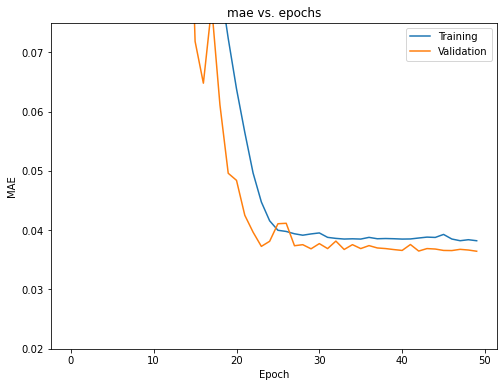

In [194]:
plt.plot(myhistory.history['mae'])
plt.plot(myhistory.history['val_mae'])
plt.title('mae vs. epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.ylim(0.02,0.075)
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Se observa que el desempeño del modelo no presenta overfitting puesto que la curva de aprendizaje de train y validation se estabilizan simultaneamente, se podría dejar de entrenar a las 30 épocas

### Variando los hiperparámetros

In [183]:
from tensorflow.keras.callbacks import EarlyStopping

In [184]:
def my_model(X_train, y_train,X_test, y_test, numberNeuron,optimizerName,numberEpoch=50, plot=False,verbose=0):
        
        model = Sequential()
        model.add(LSTM(numberNeuron, activation="relu", input_shape=(x_train.shape[1], x_train.shape[2])))
        model.add(Dense(1))

        model.compile(optimizer= optimizerName,
                     loss='mae',
                      metrics=['mae'])
        
        myhistory=model.fit(X_train, y_train,  epochs=numberEpoch, batch_size=32, validation_split=0.1, verbose=verbose,
                           callbacks=[EarlyStopping(monitor='val_mae',patience=10)] )
        
        TrainAccuracy=myhistory.history['mae'][-1]
        LossTrain=myhistory.history['loss'][-1]
        
        ValidationAccuracy=myhistory.history['val_mae'][-1]
        LossValidation=myhistory.history['val_loss'][-1]
        
        LossTest,AccuracyTest=model.evaluate( X_test,y_test)
        
        
        if plot is True:
            
            fig,ax=plt.subplots(1,1)
            ax.plot( myhistory.history['val_mae'],label='validation set mae')
            ax.plot( myhistory.history['mae'],label='train set mae')
            ax.set_ylim(0.02,0.075)
            ax.set_xlabel('epochs')
            ax.set_ylabel('accuracy')
            ax.legend()
        
        return [ [LossTrain,TrainAccuracy],
                [LossValidation,ValidationAccuracy],
                [LossTest,AccuracyTest] ]

In [88]:
my_model(x_train, y_train,x_test, y_test, numberNeuron=25,optimizerName='SGD',numberEpoch=50, plot=False,verbose=0)

3/3 [==============================] - 0s 6ms/step - loss: 0.1198 - mae: 0.1198


[[0.1249116063117981, 0.1249116063117981],
 [0.1284627765417099, 0.1284627765417099],
 [0.11977209895849228, 0.11977209895849228]]

3/3 [==============================] - 0s 5ms/step - loss: 0.0788 - mae: 0.0788


[[0.039279595017433167, 0.039279595017433167],
 [0.03690977022051811, 0.03690977022051811],
 [0.0787806361913681, 0.0787806361913681]]

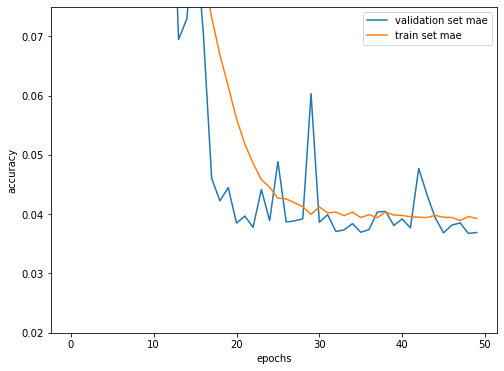

In [197]:
my_model(x_train, y_train,x_test, y_test, numberNeuron=25,optimizerName='RMSprop',numberEpoch=50, plot=True,verbose=0)

In [199]:
my_model(x_train, y_train,x_test, y_test, numberNeuron=25,optimizerName='adam',numberEpoch=50, plot=False,verbose=0)

3/3 [==============================] - 0s 0s/step - loss: 0.0774 - mae: 0.0774


[[0.03843657299876213, 0.03843657299876213],
 [0.03678536415100098, 0.03678536415100098],
 [0.077403225004673, 0.077403225004673]]

Se observa que el optimizador que mejor se desemepeña en los datos de test es adam, por tanto se sigue usando este

In [200]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.0774 - mae: 0.0774


[0.0774201899766922, 0.0774201899766922]

El valor de MAE es pequeño, lo que indica que el modelo puede reproducir satisfactoriamente los datos de test

In [201]:
y_predicted_scaled=model.predict(x_test)
y_predicted=y_scaler.inverse_transform(y_predicted_scaled)

y_test_1=y_scaler.inverse_transform(y_test) #cuidado, si se vuelve a correr los escala a valores mucho mayores

En el arreglo y_predicted están los valores predecidos del conjunto de test 

In [202]:
y_predicted[:10]

array([[93.75114 ],
       [93.25985 ],
       [92.5269  ],
       [92.06746 ],
       [92.00117 ],
       [92.96137 ],
       [93.33019 ],
       [93.73656 ],
       [94.81619 ],
       [95.379456]], dtype=float32)

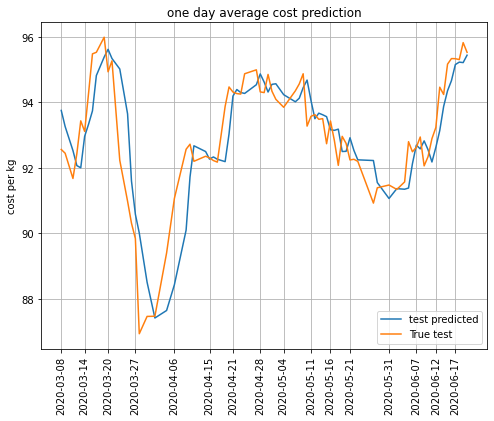

In [203]:
plt.title("one day average cost prediction")
plt.plot(dateTest_list,y_predicted,label="test predicted")
plt.plot(dateTest_list,y_test_1, label="True test")
plt.ylabel("cost per kg")
plt.tick_params(axis='x', rotation=90)
plt.xticks( dateTest_list[::5] )
plt.grid()
plt.legend()

Se observa que las predicciones coinciden en gran manera con los valores verdaderos en los datos de test, es así que tanto cualitativamente como cuantitativamente el modeo LSTM es el mejor a la hora de predecir el precio promedio por día del costo de envio por kg 


### a)
Se escoge el algoritmo LSTM que pertenece a la clase de RNN puesto que las RNN están especialmente diseñadas para procesar data secuencial. Se escoge LSTM ya que como su nombre lo dice (Long Short Term Memory networks) son NN diseñadas para "recordar" por defecto gran cantidad de datos anteriores lo que le da una ventaja respecto a otros tipos de RNN a la hora de realizar prediciones de series de tiempo puesto que se debe de tener en cuenta el comportamiento de los datos en tiempos pasados

### b)
Se implementó cuatro algoritmos aumentando la complejidad del 1 al 4 de tal manera de observar si se podian realizar predicciones acertadas de acuerdo a la naturaleza de los datos. 

Como se observó en la serie de tiempo graficada al inicio, el comportamiento de esta no es estacionario ni poseen una variación estacional marcada, esta es la razón por la cual los algoritmos de series de tiempo no predicen de manera adecuada los datos de test. Es así que se optó por usar el poder de las redes neuronales para abordar el problema debido a la flexibilidad que poseen para realizar predicciones y en particular el algoritmo LSTM gracias a su capacidad de poseer "memoria a largo plazo".


### c) 

Las NN son algoritmos de low bias pero de high variance, de tal manera que se debe de buscar el número de neuronas óptimo para que no suceda ni underfitting(low variance y hight bias) o overfitting (high variance y low bias). Como se puede observar en la gráfica anterior, la predicción en los datos de test sigue la tendencia de la forma funcional de los datos reales i.e no modela las fluctuaciones locales sino el comportamiento en general, lo que indca que el modelo implementado es bueno respecto al bias-variance-tradeoff


### d) 

Para mejorar el modelo se puede realizar una exploración completa del espacio de hiperparámetros de la red neuronal, se podría variar los escalamientos ya sea a normal estandar, robust scaler, entre otros. Variar los parámetros de los optimizadores con el fin de encontrar el que de como resultado el menor valor de MAE en los datos de test. También se podría implementar call backs como early stopping que permitan conocer cual es la época en la cual se obtienen los mejores resultados. Algo esencial para futuros trabajo es mayor poder de cómputo para encontrar el número óptimo de neuronas que minimice el MAE sin embargo, estoy conforme con las métricas obtenidas puesto que se minimizó en gran medida MAE.

##  multi-step model

Se plantea usar una red neuronal recurrente RNN para realizar predicciones multi-step, en este caso LSTM

In [278]:
dfAvgPrice2H=(dfNTG.groupby( [ dfNTG.index.floor('2H') ] )['cost_per_kg']
           .mean()
           .rename_axis('date')
          . reset_index(name='AvgPrice') )

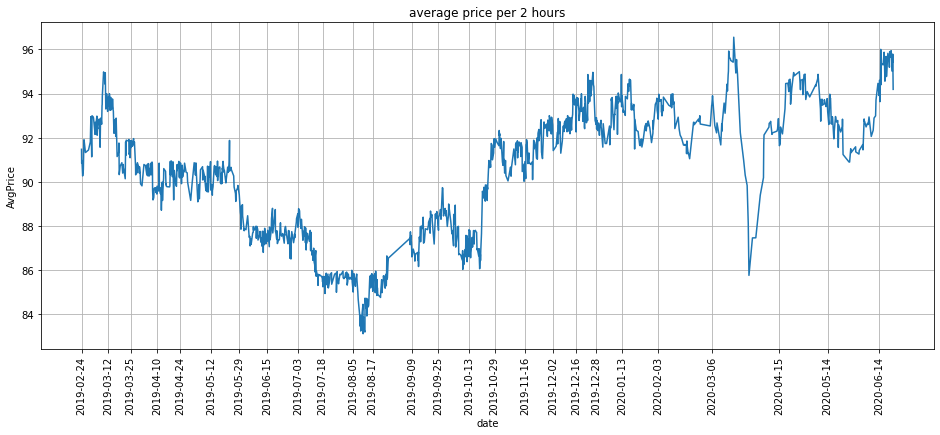

In [279]:
fig,ax=plt.subplots(figsize=(16,6))
plt.title("average price per 2 hours")
sns.lineplot(data=dfAvgPrice2H, x='date', y='AvgPrice')
plt.grid()
plt.xticks( np.array(dfAvgPrice2H['date'])[::50] )
ax.tick_params(axis='x', rotation=90)

In [280]:
dfAvgPrice2H.set_index("date",inplace=True)

In [281]:
dfAvgPrice2H.head(10)

,AvgPrice
date,
2019-02-24 08:00:00,91.476667
2019-02-24 10:00:00,90.845000
2019-02-24 14:00:00,90.970000
2019-02-25 00:00:00,90.270000
2019-02-25 10:00:00,90.550000
2019-02-25 18:00:00,91.890000
2019-02-25 20:00:00,91.910000
2019-02-26 16:00:00,91.330000
2019-02-28 12:00:00,91.446540


Diviendo los datos en train y test

In [282]:
df_train=dfAvgPrice2H[:'2020-03-06']
df_test=dfAvgPrice2H['2020-03-06':]

dateTest=df_test.index

Transformando el dataset de tal manera que el input del modelo sea el precio promedio hace 8 horas antes y el output sea la predicción de 8 horas después (como se tiene promedios cada 2 horas entonces se tienen 4 datos para predecir las 8 horas siguientes)

In [283]:
df_train=np.array(df_train)
df_test=np.array(df_test)

In [284]:
x_train=[]
y_train=[]

x_test=[]
y_test=[]

dateTest_list=[]


for i in range(4,len(df_train)-4):
    x_train.append( df_train[i-4:i] )
    y_train.append( df_train[i:i+4] ) 
    
for i in range(4,len(df_test)-4):
    x_test.append( df_test[i-4:i] )
    y_test.append( df_test[i:i+4] ) 
    dateTest_list.append(dateTest[i])

In [285]:
x_train=np.array(x_train).reshape((1093,4))
y_train=np.array(y_train).reshape((1093,4))

x_test=np.array(x_test).reshape((173,4))
y_test=np.array(y_test).reshape((173,4))

Realizando escalamiento de variables

In [286]:
from sklearn.preprocessing import MinMaxScaler

In [287]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_train=x_scaler.fit_transform(x_train)
y_train=y_scaler.fit_transform(y_train)

x_test=x_scaler.fit_transform(x_test)
y_test=y_scaler.fit_transform(y_test)

In [288]:
x_train=x_train.reshape( (1093,4,1) )
x_test=x_test.reshape( (173,4,1) )

## Modelo LSTM

In [289]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, LSTM

In [290]:
import tensorflow as tf
tf.random.set_seed(1234)

In [291]:
import numpy as np
np.version.version

'1.19.5'

In [292]:
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(4))

In [293]:
model.compile(optimizer='adam',
             loss='mae',
              metrics=['mae'])

In [294]:
myhistory=model.fit(x_train, y_train,  epochs=50, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/50
31/31 - 7s - loss: 0.3217 - mae: 0.3217 - val_loss: 0.0582 - val_mae: 0.0582
Epoch 2/50
31/31 - 0s - loss: 0.0732 - mae: 0.0732 - val_loss: 0.0580 - val_mae: 0.0580
Epoch 3/50
31/31 - 0s - loss: 0.0442 - mae: 0.0442 - val_loss: 0.0565 - val_mae: 0.0565
Epoch 4/50
31/31 - 0s - loss: 0.0420 - mae: 0.0420 - val_loss: 0.0495 - val_mae: 0.0495
Epoch 5/50
31/31 - 0s - loss: 0.0415 - mae: 0.0415 - val_loss: 0.0490 - val_mae: 0.0490
Epoch 6/50
31/31 - 0s - loss: 0.0425 - mae: 0.0425 - val_loss: 0.0495 - val_mae: 0.0495
Epoch 7/50
31/31 - 0s - loss: 0.0412 - mae: 0.0412 - val_loss: 0.0486 - val_mae: 0.0486
Epoch 8/50
31/31 - 0s - loss: 0.0406 - mae: 0.0406 - val_loss: 0.0488 - val_mae: 0.0488
Epoch 9/50
31/31 - 0s - loss: 0.0407 - mae: 0.0407 - val_loss: 0.0485 - val_mae: 0.0485
Epoch 10/50
31/31 - 1s - loss: 0.0406 - mae: 0.0406 - val_loss: 0.0482 - val_mae: 0.0482
Epoch 11/50
31/31 - 0s - loss: 0.0400 - mae: 0.0400 - val_loss: 0.0478 - val_mae: 0.0478
Epoch 12/50
31/31 - 0s - loss:

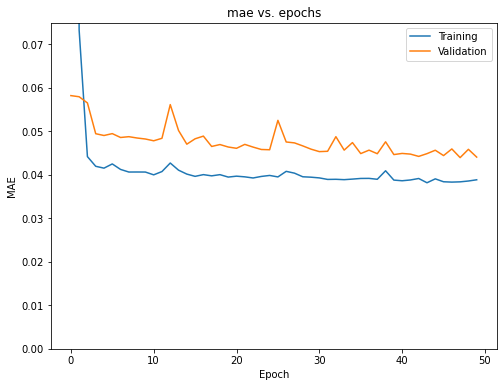

In [295]:
plt.plot(myhistory.history['mae'])
plt.plot(myhistory.history['val_mae'])
plt.title('mae vs. epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.ylim(0,0.075)
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Se observa overfitting puesto el MAE en los datos de validación no siguen decreciendo al incrementar el número de épocas por tanto se hace uso de la técnica de dropout para evitar este comportamiento (Si se hubiese entrenado con 50 no se hubiese presentado overfitting )

In [296]:
from tensorflow.keras.layers import Dropout
drate=0.5

In [297]:
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(drate))
model.add(Dense(4))

model.compile(optimizer='adam',
             loss='mae',
              metrics=['mae'])

myhistory=model.fit(x_train, y_train,  epochs=50, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/50
31/31 - 7s - loss: 0.2908 - mae: 0.2908 - val_loss: 0.0506 - val_mae: 0.0506
Epoch 2/50
31/31 - 0s - loss: 0.1055 - mae: 0.1055 - val_loss: 0.0815 - val_mae: 0.0815
Epoch 3/50
31/31 - 0s - loss: 0.0882 - mae: 0.0882 - val_loss: 0.0515 - val_mae: 0.0515
Epoch 4/50
31/31 - 0s - loss: 0.0821 - mae: 0.0821 - val_loss: 0.0532 - val_mae: 0.0532
Epoch 5/50
31/31 - 0s - loss: 0.0775 - mae: 0.0775 - val_loss: 0.0512 - val_mae: 0.0512
Epoch 6/50
31/31 - 0s - loss: 0.0724 - mae: 0.0724 - val_loss: 0.0479 - val_mae: 0.0479
Epoch 7/50
31/31 - 0s - loss: 0.0733 - mae: 0.0733 - val_loss: 0.0483 - val_mae: 0.0483
Epoch 8/50
31/31 - 0s - loss: 0.0699 - mae: 0.0699 - val_loss: 0.0482 - val_mae: 0.0482
Epoch 9/50
31/31 - 0s - loss: 0.0693 - mae: 0.0693 - val_loss: 0.0474 - val_mae: 0.0474
Epoch 10/50
31/31 - 0s - loss: 0.0691 - mae: 0.0691 - val_loss: 0.0495 - val_mae: 0.0495
Epoch 11/50
31/31 - 0s - loss: 0.0641 - mae: 0.0641 - val_loss: 0.0544 - val_mae: 0.0544
Epoch 12/50
31/31 - 0s - loss:

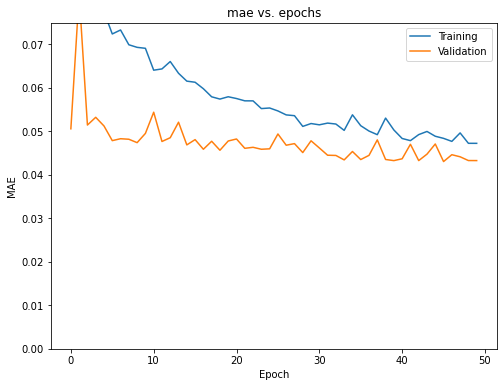

In [298]:
plt.plot(myhistory.history['mae'])
plt.plot(myhistory.history['val_mae'])
plt.title('mae vs. epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.ylim(0,0.075)
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Se observa que se ha solventado el problema de overfitting usando la técnia dropout, se escogió drate=0.5 debido a que el número de neuronas es considerablemente grande

Es razonable que el error de validación sea menor que el error de entrenamiento pues se está usando dropout. Generalmente dropout se activa cuando se entrena, pero se desactiva cuando se evalúa en el conjunto de validación. De tal manera que se btiene una función más suave (generalmente significa mejor) en el último caso.


### evaluando el modelo

In [299]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.0717 - mae: 0.0717


[0.07167457044124603, 0.07167457044124603]

Se observa un buen desempeño en los datos de test puesto que posee un MAE de 0.07 

re-escalando los datos

In [300]:
y_predicted_scaled=model.predict(x_test)
y_predicted=y_scaler.inverse_transform(y_predicted_scaled)

y_test=y_scaler.inverse_transform(y_test)

El arreglo y_predicted contiene la predicción de las siguientes 8 horas del precio promedio de cargamento por kg

In [301]:
y_predicted[:10]

array([[93.47945 , 93.40031 , 93.318756, 93.36989 ],
       [93.044945, 92.95797 , 92.89708 , 92.94345 ],
       [92.7412  , 92.674545, 92.60901 , 92.65896 ],
       [92.36909 , 92.3069  , 92.24391 , 92.28609 ],
       [92.312035, 92.2649  , 92.19276 , 92.23958 ],
       [92.37764 , 92.33627 , 92.25802 , 92.306885],
       [92.5123  , 92.47722 , 92.38727 , 92.436806],
       [92.57993 , 92.52709 , 92.45071 , 92.497826],
       [92.581955, 92.53239 , 92.454216, 92.503105],
       [92.71507 , 92.67493 , 92.5858  , 92.638725]], dtype=float32)

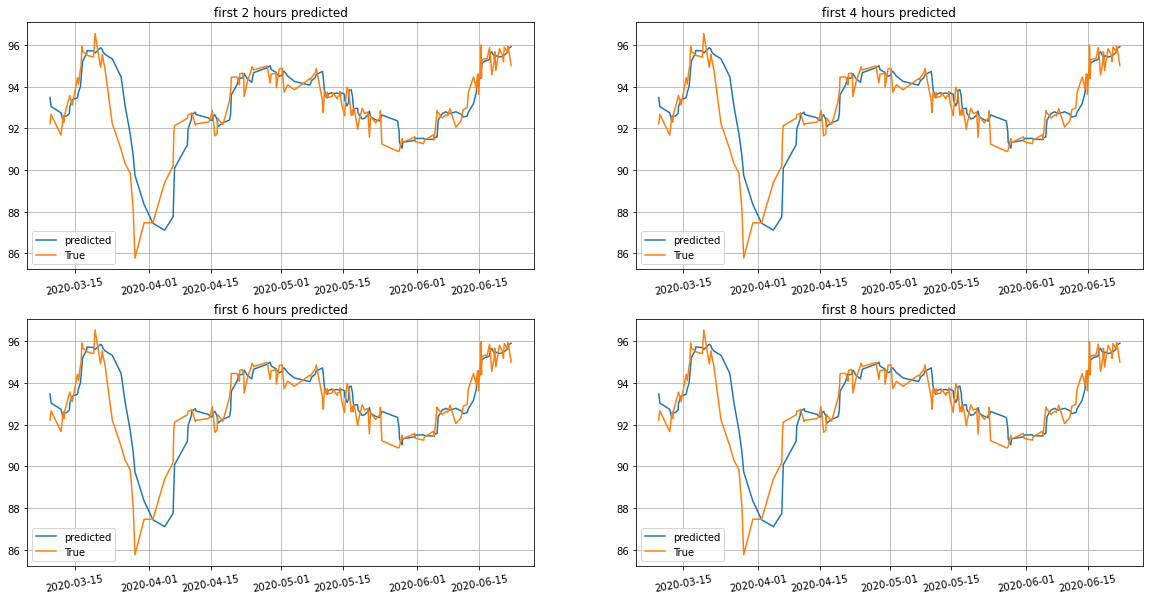

In [302]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(20,10))

ax[0,0].set_title("first 2 hours predicted")
ax[0,0].plot(dateTest_list,y_predicted[:,0], label="predicted")
ax[0,0].plot(dateTest_list,y_test[:,0], label="True")
ax[0,0].grid()
ax[0,0].tick_params(axis='x', labelrotation=10)
ax[0,0].legend()


ax[0,1].set_title("first 4 hours predicted")
ax[0,1].plot(dateTest_list,y_predicted[:,0], label="predicted")
ax[0,1].plot(dateTest_list,y_test[:,0], label="True")
ax[0,1].grid()
ax[0,1].tick_params(axis='x', labelrotation=10)
ax[0,1].legend()

ax[1,0].set_title("first 6 hours predicted")
ax[1,0].plot(dateTest_list,y_predicted[:,0], label="predicted")
ax[1,0].plot(dateTest_list,y_test[:,0], label="True")
ax[1,0].grid()
ax[1,0].tick_params(axis='x', labelrotation=10)
ax[1,0].legend()

ax[1,1].set_title("first 8 hours predicted")
ax[1,1].plot(dateTest_list,y_predicted[:,0], label="predicted")
ax[1,1].plot(dateTest_list,y_test[:,0], label="True")
ax[1,1].grid()
ax[1,1].tick_params(axis='x', labelrotation=10)
ax[1,1].legend()

Se observa que cualitativamente que en los datos de test las predicciones son bastante buenas puesto que reproducen casi exactamente el comportamiento de los datos